<a href="https://colab.research.google.com/github/Suraj-7077/Supervised-ML-regression-Bike-sharing-demand-prediction-capstone-project-II/blob/main/Supervised_ML_Classification_Capstone_project_III_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Info:- 

## Project Type - EDA and Supervised ML Classification Model Building

## Project Title - Bike Sharing Demand Prediction

## Contribution - Individual

## Created by - Suraj Shrikant Galande

# Project Statement :-  

## Business objective:-  

### Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business.

###  The main objective is to create a machine learning model to characterize the mail and track the mail that is:- 
ignored:- Class = 0 

read:- Class = 1

 acknowledged by the reader :- Class =2

# GitHub Repo Link

https://github.com/Suraj-7077/Supervised-ML-Classification-Email-campaign-prediction.git

# Dataset Description

1) Email_ID - This column contains email ids of customers.

2)  Email_type - Email type contains 2 categories i.e. 1 and 2. We can assume that the types are like marketing emails or important updates,notices like email regarding the business 

3) Subject_Hotness_Score - It is the emails subject's score on the basis of how good and effective contents is.

4) Email_Source - It represents the source of the email like sales and marketing or important admin mails related to the product.

5) Email_Campaign_Type - The Campaign type of email.

6) Total_Past_Communications - This mail contains, The total previous mails from the same source, the number of communication with customers had. 

7) Customer_Location - Categorical data which explains the different demographic location of the customers.

8) Time_Email_sent_Category - It has 3 categories of time slots:

 email sent at morning time slot = 1

 email sent at evening time slot = 2

 email sent at night time sllot = 3

9) Word_Count - It contains the no.of words in the mail.

10) Total_Links - Total links in the email body.

11) Total_Images - The number of images in the email body.

12) Email_Status - It is the target variable which contains the characterization of the mail that is 

ignored = 0 

read = 1

acknowledged by the reader = 2

## Now performing EDA and see how this email dataset is giving prediction regarding email status 

# EDA 

## Importing Lbraries 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# To build ML models Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import MultinomialNB

# Importing warnings to avoid it if any generated in code
import warnings 
warnings.filterwarnings('ignore')

## loading dataset

In [3]:
path = "/content/drive/MyDrive/ Capstone project/Supervised ML Classification Project/data_email_campaign.csv"

In [4]:
email_df = pd.read_csv(path)

## Dataset view

In [5]:
# looking First 5 rows of dataset

email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [8]:
email_df.shape

(68353, 12)

As we see that email dataset contains 68353 number of observations (Rows) and 12 features (columns).

In [9]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [17]:
email_df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

# Statistical summary of dataset

In [13]:

email_df.describe(include='all')                 ## include = 'all' contains all numerical and categorical features.

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00081000034500,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


This displays summary of statistics of dataframe

Information of different descriptive statistics :-

1) Measures of Frequency :- Count, Percent, Frequency.

2) Measures of Central Tendency :- Mean, Median, and Mode.

3)Measures of Dispersion or Variation or spread :- Range( max - min ),Variance, Standard Deviation.

4) Measures of Position :- Percentile Ranks, Quartile Ranks.

# Preprocessing The Data

## Checking Null values 

In [10]:
email_df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [16]:
# Percentage of null values in each feature

print(email_df.isnull().sum()/ len(email_df)*100)
pd.options.display.float_format = '{:,.2f} %'.format

Email_ID                     0.00 %
Email_Type                   0.00 %
Subject_Hotness_Score        0.00 %
Email_Source_Type            0.00 %
Customer_Location           16.96 %
Email_Campaign_Type          0.00 %
Total_Past_Communications    9.98 %
Time_Email_sent_Category     0.00 %
Word_Count                   0.00 %
Total_Links                  3.22 %
Total_Images                 2.45 %
Email_Status                 0.00 %
dtype: float64


---> We have some features which have null values present

1) Customer_location column have 11595 i.e. 16.96% of observations are missing 

2) Total_past_Communications have 6825 i.e 9.98% of  observations are missing

3) Total_links have 2201 i.e. 3.22% of observations are missing

4) Total_Images have 1677 i.e. 2.45% of observations are missing.


So there are quite large number of null values presents in thses 4 features so we will be handling in data cleaning section.

## Checking duplicated values

In [12]:
email_df.duplicated().sum()

0

---> hence no duplicated values present in features so no need to perform duplication removel operation

# Handling Missing values

The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

features which have null values :-  

i) Customer_location 

ii) Total_past_Communications

 iii) Total_links

 iv) Total_Images 

### i) Handling Null values of Customer_locations feature

In [19]:
# First of all checking distribution of Customer_location feature

email_df['Customer_Location'].value_counts()

G    23173
E    10193
D     7406
C     5758
F     4433
B     4341
A     1454
Name: Customer_Location, dtype: int64

<AxesSubplot:xlabel='Customer_Location', ylabel='count'>

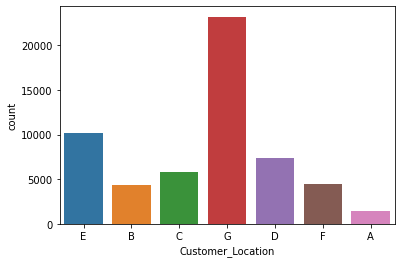

In [22]:
sns.countplot(email_df['Customer_Location'])

### Checking dependancy of customer location wrt dependent feature ( Email_status)

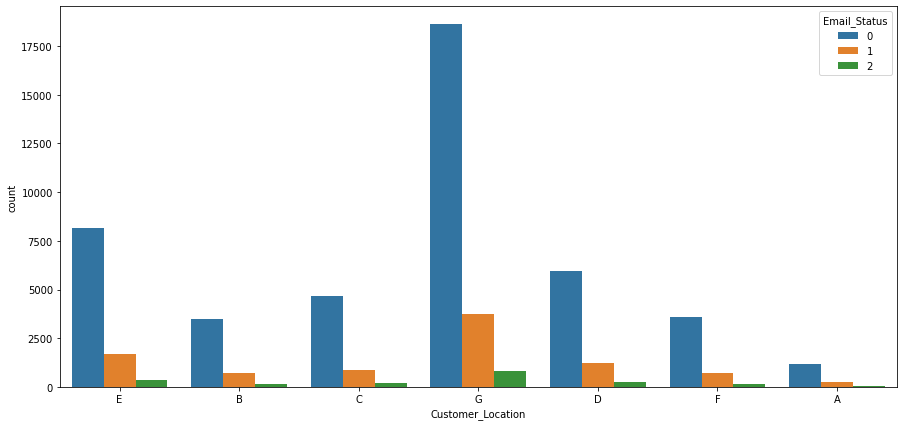

In [29]:
plt.figure(figsize=(15,7))
ax = sns.countplot(email_df['Customer_Location'], hue=email_df['Email_Status'])


Since Customer_location contains 16.96% of missing values i.e. there are very large number of missing values in this feature so this feature will not give much importance in our dataset. 

As we can see irrespective of location the  <b>Email_Status</b> is same throughout.
so it is better to drop this column instead of treating null values.